# [1] V(S) по уравнению Михаэлиса-Ментен, для различных KM и Vm (на одном графике)

__Примечание:__  Все непрогружающиеся картинки подписаны - они могут быть найдены в репозитории с данным ноутбуком

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
def MM(x, v_max, K_M):
    return np.array(list(map(lambda s:  (v_max*s)/(K_M + s), x)))

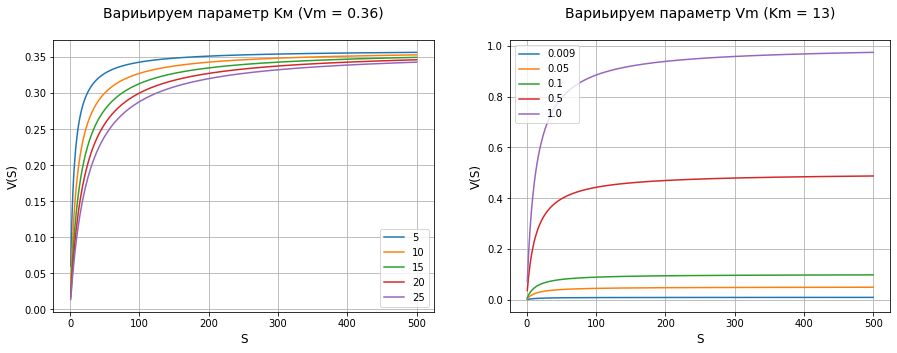

In [4]:
plt.figure(figsize=(15,5))
x = np.arange(1,501,1)

pylab.subplot (1, 2, 1)
y1 = MM(x, 0.36, 5)
y2 = MM(x, 0.36, 10)
y3 = MM(x, 0.36, 15)
y4 = MM(x, 0.36, 20)
y5 = MM(x, 0.36, 25)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Вариьируем параметр Kм (Vm = 0.36)\n', fontsize=14)
plt.xlabel('S', fontsize=12)
plt.ylabel('V(S)', fontsize=12)
plt.grid()
plt.legend([5, 10, 15, 20, 25])

pylab.subplot (1, 2, 2)
y1 = MM(x, 0.009, 13)
y2 = MM(x, 0.05, 13)
y3 = MM(x, 0.1, 13)
y4 = MM(x, 0.5, 13)
y5 = MM(x, 1.0, 13)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Вариьируем параметр Vm (Km = 13)\n', fontsize=14)
plt.xlabel('S', fontsize=12)
plt.ylabel('V(S)', fontsize=12)
plt.grid()
plt.legend([0.009, 0.05, 0.1, 0.5, 1.0])

# [2] Скорость реакции от концентрации субстрата и ингибитора для различных координат и типов ингибирования

## Прямые координаты (формулы - по Ленинджеру)

__Конкурентное ингибирование__  
  
В присутствии конкурентного ингибитора уравнение ММ приобретает следующий вид:  
$ v_0 = \frac {V_{max}S } {\alpha K_M + S}  $, при этом  
$ \alpha = 1 + \frac {I} {K_I}  $  
$ K_I = \frac {E * I} {EI} $  
Значит,  
$ v_0 = \frac {V_{max}S } {\alpha K_M + S} = \frac {V_{max}S } {(1 + \frac {I * EI} {E*I} ) K_M + S} = $  
$ \frac {V_{max}S } {(1 + \frac {EI} {E} ) K_M + S} $
  
По условию, варьируем S и I

In [3]:
def Koncurent(K_M, v_max, x, E, EI): # x - fix arr, v_max, E, EI - fix, I - NOT FIX
    #K_i = E * I / EI
    alpha = 1 + (EI / E)
    return np.array(list(map(lambda s: (v_max * s) / (alpha * K_M + s), x)))

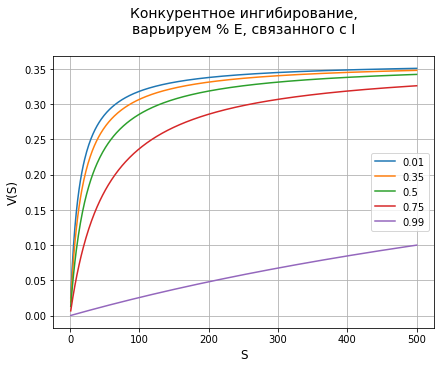

In [4]:
x = np.arange(1,501,1) # S
E = 0.00123 * 0.8; EI = 0.00123 * 0.2

plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)
x = np.arange(1,501,1)
y1 = Koncurent(13, 0.36, x, 0.00123 * 0.99, 0.00123 * 0.01)
y2 = Koncurent(13, 0.36, x, 0.00123 * 0.75, 0.00123 * 0.25)
y3 = Koncurent(13, 0.36, x, 0.00123 * 0.5, 0.00123 * 0.5)
y4 = Koncurent(13, 0.36, x, 0.00123 * 0.25, 0.00123 * 0.75)
y5 = Koncurent(13, 0.36, x, 0.00123 * 0.01, 0.00123 * 0.99)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)

plt.title('Конкурентное ингибирование,\nварьируем % E, связанного с I\n', fontsize=14)
plt.xlabel('S', fontsize=12)
plt.ylabel('V(S)', fontsize=12)
plt.grid()
plt.legend([0.01, 0.35, 0.5, 0.75, 0.99])

__Бесконкурентное ингибирование__  
$ v = \frac {V_{max} S} {K_M + \alpha S} = ... = \frac {V_{max} S} {K_M + S (1 + \frac {ESI} {ES} ) } $  
Будем варьировать соотношение ESI / ES, так как у меня нет реальных данных по изменениям концентраций  ES, ESI, I для какого-либо фермента (экспериментальных данных)

In [9]:
def NoKoncurent(K_M, v_max, x, ES, ESI): 
    alpha = 1 + (ESI / ES)
    return np.array(list(map(lambda s: (v_max * s) / (K_M + s * alpha), x)))

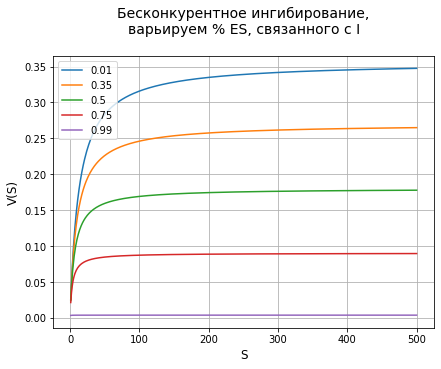

In [10]:
x = np.arange(1,501,1) # S

plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)
x = np.arange(1,501,1)
y1 = NoKoncurent(13, 0.36, x, 0.99, 0.01)
y2 = NoKoncurent(13, 0.36, x, 0.75, 0.25)
y3 = NoKoncurent(13, 0.36, x, 0.5, 0.5)
y4 = NoKoncurent(13, 0.36, x, 0.25, 0.75)
y5 = NoKoncurent(13, 0.36, x, 0.01, 0.99)

plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)

plt.title('Бесконкурентное ингибирование,\nварьируем % ES, связанного с I\n', fontsize=14)
plt.xlabel('S', fontsize=12)
plt.ylabel('V(S)', fontsize=12)
plt.grid()
plt.legend([0.01, 0.35, 0.5, 0.75, 0.99])

__Смешанное ингибирование__  
$ v = \frac {V_{max}S} {\alpha K_M + \alpha' S} = \frac {V_{max}S} {(1 + \frac {EI} {E} ) K_M + S (1 + \frac {ESI} {ES} )}$  
  
Будем варьировать соотношения EI/E, ESI/ES, так как у нас опять же нет экспериментальных данных. Будем предполагать более "эффективное" конкурентное и менее "эффективное" бесконкурентное ингибирование  

In [11]:
def Mix(K_M, v_max, x, EI, E, ES, ESI): 
    alpha_a = 1 + (EI/E)
    alpha_b = 1 + (ESI / ES)
    return np.array(list(map(lambda s: (v_max * s) / (alpha_a * K_M + s * alpha_b), x)))

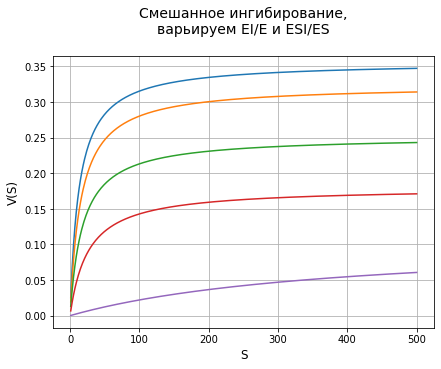

In [12]:
x = np.arange(1,501,1) # S

plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)
x = np.arange(1,501,1)
y1 = Mix(13, 0.36, x, 0.01, 0.99, 0.99, 0.01)
y2 = Mix(13, 0.36, x, 0.25, 0.75, 0.9, 0.1)
y3 = Mix(13, 0.36, x, 0.5, 0.5, 0.7, 0.3)
y4 = Mix(13, 0.36, x, 0.75, 0.25, 0.5, 0.5)
y5 = Mix(13, 0.36, x, 0.99, 0.01, 0.3, 0.7)

plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)

plt.title('Смешанное ингибирование,\nварьируем EI/E и ESI/ES\n', fontsize=14)
plt.xlabel('S', fontsize=12)
plt.ylabel('V(S)', fontsize=12)
plt.grid()

__Неконкурентное ингибирование__  
Возникает при $ \alpha = \alpha' $, то-есть:  
$ v = \frac {V_{max}S} {\alpha K_M + \alpha S} =  \frac {V_{max}S} {\alpha(K_M + S)} $  

In [13]:
def NK(K_M, v_max, x, EI, E): 
    alpha = 1 + (EI/E)
    return np.array(list(map(lambda s: (v_max * s) / (alpha * K_M + s * alpha), x)))

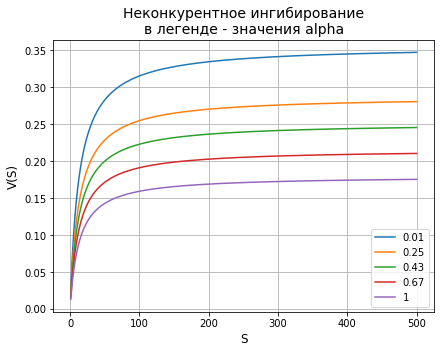

In [14]:
x = np.arange(1,501,1) # S

plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)
x = np.arange(1,501,1)
y1 = NK(13, 0.36, x, 0.01, 0.99)
y2 = NK(13, 0.36, x, 0.2, 0.8)
y3 = NK(13, 0.36, x, 0.3, 0.7)
y4 = NK(13, 0.36, x, 0.4, 0.6)
y5 = NK(13, 0.36, x, 0.5, 0.5)

plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)

plt.title('Неконкурентное ингибирование\nв легенде - значения alpha', fontsize=14)
plt.xlabel('S', fontsize=12)
plt.ylabel('V(S)', fontsize=12)
plt.grid()
plt.legend([0.01, 0.25, 0.43, 0.67, 1]) # alpha

## Двойные обратные координаты (формулы - по Ленинджеру)

__Конкурентное ингибирование__  
$ \frac {1} {v} = \frac {\alpha K_M} {V_{max}} \frac {1} {S} + \frac {1} {V_{max}} $, $ \alpha = 1 + \frac {EI} {E}  $

In [15]:
def Konc(x, K_M, v_max, EI, E):
    alpha = 1 + EI/E
    return np.array(list(map(lambda s: alpha*K_M*s/(v_max) + 1/v_max, x)))

In [16]:
x = np.arange(1,501,1)
x = np.array(list(map(lambda t: 1/t, x)))

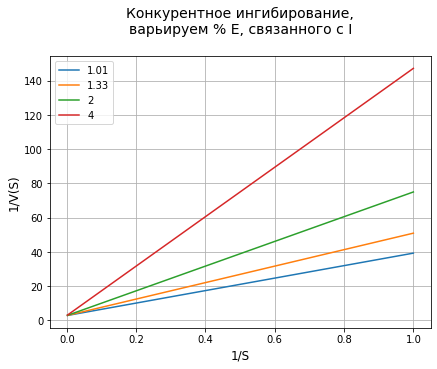

In [17]:
plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)

y1 = Konc(x, 13, 0.36, 0.01, 0.99)
y2 = Konc(x, 13, 0.36, 0.25, 0.75)
y3 = Konc(x, 13, 0.36, 0.5, 0.5)
y4 = Konc(x, 13, 0.36, 0.75, 0.25)

plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.title('Конкурентное ингибирование,\nварьируем % E, связанного с I\n', fontsize=14)
plt.xlabel('1/S', fontsize=12)
plt.ylabel('1/V(S)', fontsize=12)
plt.grid()
plt.legend([1.01, 1.33, 2, 4]) # alpha

__Бесконкурентное ингибирование__  
$ \frac {1} {v} = \frac {K_M} {V_{max}} \frac {1} {S} + \frac {\alpha'} {V_{max}}   $ , $ \alpha' = 1 + \frac {ESI} {ES} $  

In [18]:
def WithoutKonc(x, K_M, v_max, ESI, ES):
    alpha = 1 + ESI/ES
    return np.array(list(map(lambda s: K_M * s/(v_max) + alpha/v_max, x)))

In [19]:
x = np.arange(1,501,1)
x = np.array(list(map(lambda t: 1/t, x)))

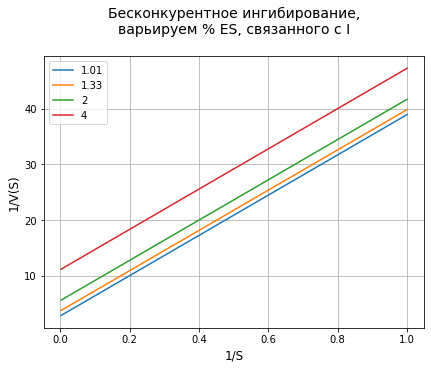

In [21]:
plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)

y1 = WithoutKonc(x, 13, 0.36, 0.01, 0.99)
y2 = WithoutKonc(x, 13, 0.36, 0.25, 0.75)
y3 = WithoutKonc(x, 13, 0.36, 0.5, 0.5)
y4 = WithoutKonc(x, 13, 0.36, 0.75, 0.25)

plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.title('Бесконкурентное ингибирование,\nварьируем % ES, связанного с I\n', fontsize=14)
plt.xlabel('1/S', fontsize=12)
plt.ylabel('1/V(S)', fontsize=12)
plt.grid()
plt.legend([1.01, 1.33, 2, 4]) # alpha

__Смешанное ингибирование__  
$ \frac {1} {v} = \frac {\alpha K_M} {V_{max}} \frac {1} {S} + \frac {\alpha'} {V_{max}} $ , $ \alpha = 1 + \frac {EI} {E}  $ , $ \alpha' = 1 + \frac {ESI} {ES} $  

In [22]:
def M(x, K_M, v_max, EI, E, ESI, ES):
    alpha_a = 1 + EI/E
    alpha_b = 1 + ESI/ES
    return np.array(list(map(lambda s: K_M * s * alpha_a/(v_max) + alpha_b/v_max, x)))

In [23]:
x = np.arange(1,501,1)
x = np.array(list(map(lambda t: 1/t, x)))

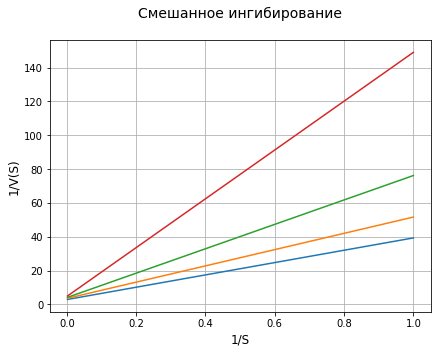

In [24]:
plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)

y1 = M(x, 13, 0.36, 0.01, 0.99, 0.01, 0.99)
y2 = M(x, 13, 0.36, 0.25, 0.75, 0.2, 0.8)
y3 = M(x, 13, 0.36, 0.5, 0.5, 0.3, 0.7)
y4 = M(x, 13, 0.36, 0.75, 0.25, 0.4, 0.6)

plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.title('Смешанное ингибирование\n', fontsize=14)
plt.xlabel('1/S', fontsize=12)
plt.ylabel('1/V(S)', fontsize=12)
plt.grid()

__Неконкурентное ингибирование__  
Как было сказано ранее, $ \alpha = \alpha' $  

In [25]:
def What(x, K_M, v_max, EI, E):
    alpha_a = 1 + EI/E
    alpha_b = alpha_a
    return np.array(list(map(lambda s: K_M * s * alpha_a/(v_max) + alpha_b/v_max, x)))

In [26]:
x = np.arange(1,501,1)
x = np.array(list(map(lambda t: 1/t, x)))

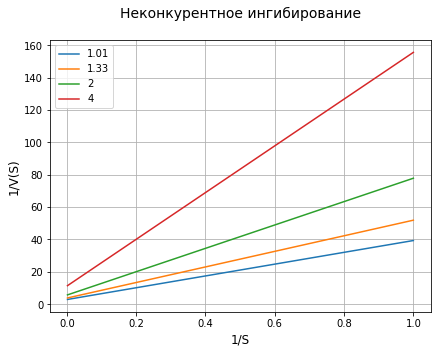

In [27]:
plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)

y1 = What(x, 13, 0.36, 0.01, 0.99)
y2 = What(x, 13, 0.36, 0.25, 0.75)
y3 = What(x, 13, 0.36, 0.5, 0.5)
y4 = What(x, 13, 0.36, 0.75, 0.25)

plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.title('Неконкурентное ингибирование\n', fontsize=14)
plt.xlabel('1/S', fontsize=12)
plt.ylabel('1/V(S)', fontsize=12)
plt.grid()
plt.legend([1.01, 1.33, 2, 4]) # alpha

# [3] Cкорость реакции от концентрации 1-го и 2-го субстратов для различных координат

__Типы двухсубстратных реакций:__  
* Sequential reactions ~ оба субстрата присоединяются к ферменту до начала реакции (до появления продукта)  
    - Ordered sequential ~ присоединение субстратов в строго определенном порядке  
    - Random Sequential ~ присоединение субстратов в любом порядке  
* Ping-Pong mechanism ~ возникновение одного/нескольких продуктов до присоединения всех субстратов  
  
Два механизма двухсубстратной реакции можно различить посредством кинетики начальных скоростей  
  
__Ordered reaction rate equation__  
$ \frac {1} {v} = \frac {1} {V_{max}} + \frac {K^{A}_M} {V_{max}} \frac {1} {A} + \frac {K^{B}_M} {V_{max}} \frac {1} {B} + \frac {K^{A}_M K^{B}_M} {V_{max}} \frac {1} {A} \frac {1} {B} $  
  
__Ping-Pong rate equation__  
$ \frac {1} {v} = \frac {K^{A}_M} {V_{max}} \frac {1} {A} + \frac {K^{B}_M} {V_{max}} \frac {1} {B} + \frac {1} {V_{max}} $  
  
  
Посчитала вручную, получилось ($ \alpha_i, \beta_j $ - какие-то константы):  
__Ordered__  
$ \frac {1} {v} = \alpha_1 + \alpha_2 \frac {1} {A} + \alpha_3 \frac {1} {B} + \alpha_4 \frac {1} {AB} $  
  
В прямых координатах:  
$ v = \frac {\beta_5 AB} {\beta_1 B + \beta_2 A + \beta_3 AB + \beta_4} $
  
__Ping-Pong__  
$ \frac {1} {v} = \alpha_1 \frac {1} {A} + \alpha_2 \frac {1} {B} + \alpha_3 $  
  
В прямых координатах:  
$ v = \frac {\beta_1 AB} {\beta_2 A + \beta_3 B + \beta_4 AB}  $

__Ordered mechanism, прямые координаты__  

In [59]:
def Ordered_A(A, b1, b2, b3, b4, b5, b):
    AB = np.array([i * b for i in A])
    
    out = []
    for a, ab in zip(A, AB):
        out.append((b5*ab)/(b1 + b2*a + b3*b + b4*ab))
    
    return np.array(out)

def Ordered_B(B, b1, b2, b3, b4, b5, a):
    AB = np.array([i * a for i in B])
    
    out = []
    for b, ab in zip(B, AB):
        out.append((b5*ab)/(b2*a + b3*b + b4*ab))
    
    return np.array(out)

In [60]:
x = np.arange(1,500,1)

In [43]:
# Сгенерируем константы
import random
[random.randint(10, 25) for i in range(5)]

[12, 23, 11, 11, 15] 
 316 
 175 
 116


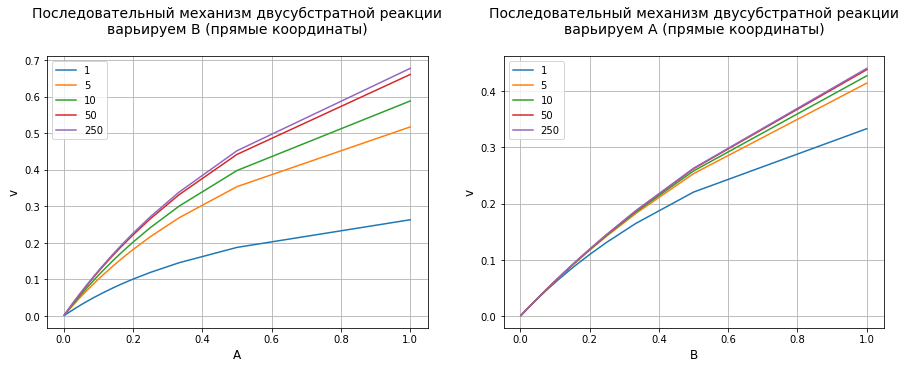

In [152]:
plt.figure(figsize=(15,5))

pylab.subplot (1, 2, 1)
y1 = Ordered_A(x, 12, 23, 11, 11, 15, 1)
y2 = Ordered_A(x, 12, 23, 11, 11, 15, 5)
y3 = Ordered_A(x, 12, 23, 11, 11, 15, 10)
y4 = Ordered_A(x, 12, 23, 11, 11, 15, 50)
y5 = Ordered_A(x, 12, 23, 11, 11, 15, 250)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Последовательный механизм двусубстратной реакции\nварьируем B (прямые координаты)\n', fontsize=14)
plt.xlabel('A', fontsize=12)
plt.ylabel('v', fontsize=12)
plt.grid()
plt.legend([1, 5, 10, 50, 250])

pylab.subplot (1, 2, 2)
y1 = Ordered_B(x, 12, 23, 11, 11, 15, 1)
y2 = Ordered_B(x, 12, 23, 11, 11, 15, 5)
y3 = Ordered_B(x, 12, 23, 11, 11, 15, 10)
y4 = Ordered_B(x, 12, 23, 11, 11, 15, 50)
y5 = Ordered_B(x, 12, 23, 11, 11, 15, 250)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Последовательный механизм двусубстратной реакции\nварьируем A (прямые координаты)\n', fontsize=14)
plt.xlabel('B', fontsize=12)
plt.ylabel('v', fontsize=12)
plt.grid()
plt.legend([1, 5, 10, 50, 250])

__Ping-Pong mechanism, прямые координаты__

In [69]:
def PP_A(A, b1, b2, b3, b4, b5, b):
    AB = np.array([i * b for i in A])
    out = []
    for a, ab in zip(A, AB):
        out.append((b1*ab)/(b2*a + b3*b + b4*ab))
    return np.array(out)
        
def PP_B(B, b1, b2, b3, b4, b5, a):
    AB = np.array([i * a for i in B])
    
    out = []
    for b, ab in zip(B, AB):
        out.append((b1*ab)/(b2*a + b3*b + b4*ab))
    return np.array(out)

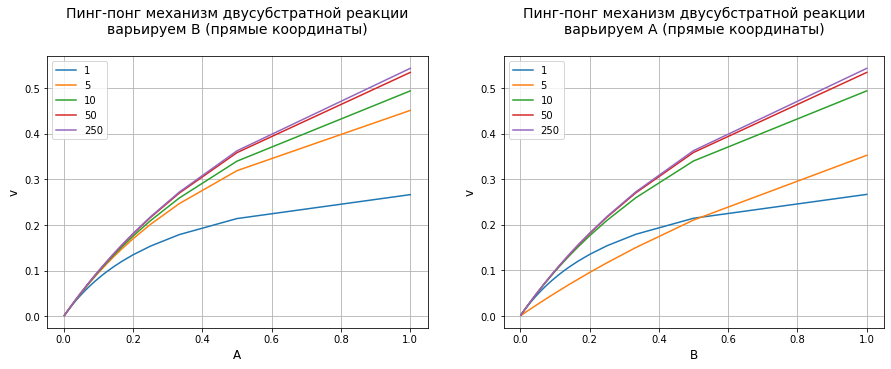

In [151]:
plt.figure(figsize=(15,5))

pylab.subplot (1, 2, 1)
y1 = PP_A(x, 12, 23, 11, 11, 15, 1)
y2 = PP_A(x, 12, 23, 11, 11, 15, 5)
y3 = PP_A(x, 12, 23, 11, 11, 15, 10)
y4 = PP_A(x, 12, 23, 11, 11, 15, 50)
y5 = PP_A(x, 12, 23, 11, 11, 15, 250)

plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Пинг-понг механизм двусубстратной реакции\nварьируем B (прямые координаты)\n', fontsize=14)
plt.xlabel('A', fontsize=12)
plt.ylabel('v', fontsize=12)
plt.grid()
plt.legend([1, 5, 10, 50, 250])

pylab.subplot (1, 2, 2)
y2 = PP_B(x, 12, 23, 11, 11, 15, 1)
y2 = PP_B(x, 12, 23, 11, 11, 15, 5)
y2 = PP_B(x, 12, 23, 11, 11, 15, 10)
y2 = PP_B(x, 12, 23, 11, 11, 15, 50)
y2 = PP_B(x, 12, 23, 11, 11, 15, 250)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Пинг-понг механизм двусубстратной реакции\nварьируем A (прямые координаты)\n', fontsize=14)
plt.xlabel('B', fontsize=12)
plt.ylabel('v', fontsize=12)
plt.grid()
plt.legend([1, 5, 10, 50, 250])

__Ordered mechanism, обратные координаты__   
$ \frac {1} {v} = \alpha_1 + \alpha_2 \frac {1} {A} + \alpha_3 \frac {1} {B} + \alpha_4 \frac {1} {AB} $  

In [119]:
def revOrdered_A(A, b, a1, a2, a3, a4):
    AB = []
    for i in A:
        AB.append(i * (1/b))
    
    out = []
    for a, ab in zip(A, AB):
        out.append(a1 + a2 * a + a3 * (1/b) + a4 * ab)
    
    return out

def revOrdered_B(B, a, a1, a2, a3, a4):
    AB = []
    for i in B:
        AB.append(i * (1/a))
    
    out = []
    for b, ab in zip(B, AB):
        out.append(a1 + a2 * (1/a) + a3 * b + a4 * ab)
    
    return out

In [112]:
x = np.arange(1,501,1)
x = np.array(list(map(lambda t: 1/t, x)))

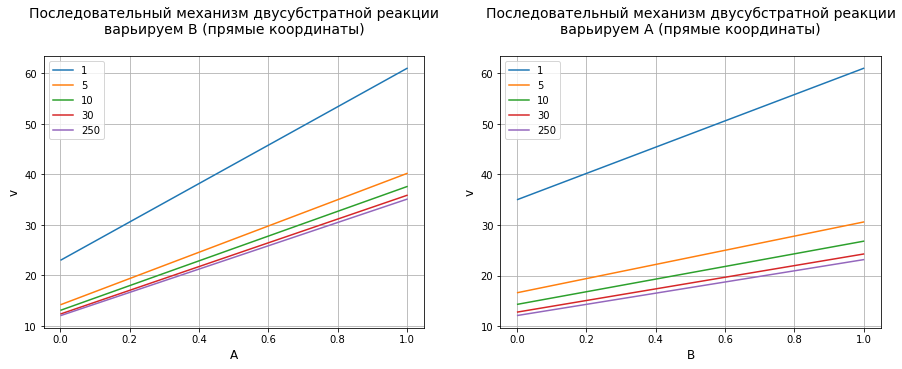

In [128]:
plt.figure(figsize=(15,5))

pylab.subplot (1, 2, 1)
y1 = revOrdered_A(x, 1, 12, 23, 11, 15)
y2 = revOrdered_A(x, 5, 12, 23, 11, 15)
y3 = revOrdered_A(x, 10, 12, 23, 11, 15)
y4 = revOrdered_A(x, 30, 12, 23, 11, 15)
y5 = revOrdered_A(x, 250, 12, 23, 11, 15)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Последовательный механизм двусубстратной реакции\nварьируем B (прямые координаты)\n', fontsize=14)
plt.xlabel('A', fontsize=12)
plt.ylabel('v', fontsize=12)
plt.grid()
plt.legend([1, 5, 10, 30, 250])

pylab.subplot (1, 2, 2)
y1 = revOrdered_B(x, 1, 12, 23, 11, 15)
y2 = revOrdered_B(x, 5, 12, 23, 11, 15)
y3 = revOrdered_B(x, 10, 12, 23, 11, 15)
y4 = revOrdered_B(x, 30, 12, 23, 11, 15)
y5 = revOrdered_B(x, 250, 12, 23, 11, 15)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Последовательный механизм двусубстратной реакции\nварьируем А (прямые координаты)\n', fontsize=14)
plt.xlabel('В', fontsize=12)
plt.ylabel('v', fontsize=12)
plt.grid()
plt.legend([1, 5, 10, 30, 250])

__Ping-Pong mechanism__   
$ \frac {1} {v} = \alpha_1 \frac {1} {A} + \alpha_2 \frac {1} {B} + \alpha_3 $   

In [137]:
def refPP_A(A, b, a1, a2, a3):
    return np.array([a1 * a + a2 * (1/b) + a3 for a in A])

def refPP_B(B, a, a1, a2, a3):
    return np.array([a1 * (1/a) + a2 * b + a3 for b in B])

In [138]:
x = np.arange(1,501,1)
x = np.array(list(map(lambda t: 1/t, x)))

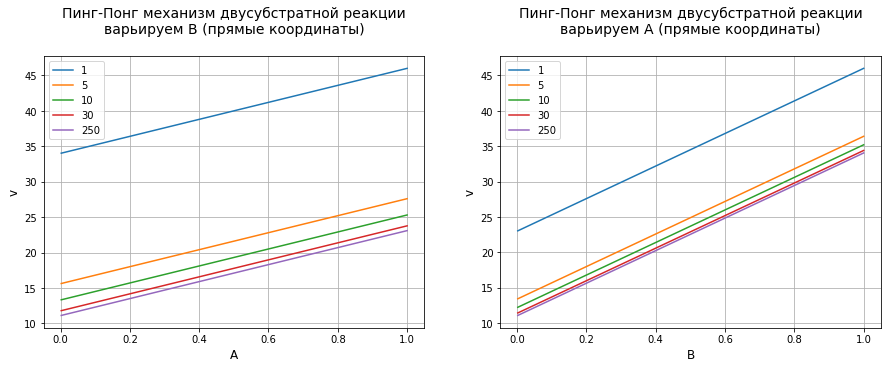

In [139]:
plt.figure(figsize=(15,5))

pylab.subplot (1, 2, 1)
y1 = refPP_A(x, 1, 12, 23, 11)
y2 = refPP_A(x, 5, 12, 23, 11)
y3 = refPP_A(x, 10, 12, 23, 11)
y4 = refPP_A(x, 30, 12, 23, 11)
y5 = refPP_A(x, 250, 12, 23, 11)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Пинг-Понг механизм двусубстратной реакции\nварьируем B (прямые координаты)\n', fontsize=14)
plt.xlabel('A', fontsize=12)
plt.ylabel('v', fontsize=12)
plt.grid()
plt.legend([1, 5, 10, 30, 250])

pylab.subplot (1, 2, 2)
y1 = refPP_B(x, 1, 12, 23, 11)
y2 = refPP_B(x, 5, 12, 23, 11)
y3 = refPP_B(x, 10, 12, 23, 11)
y4 = refPP_B(x, 30, 12, 23, 11)
y5 = refPP_B(x, 250, 12, 23, 11)
plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5)
plt.title('Пинг-Понг механизм двусубстратной реакции\nварьируем А (прямые координаты)\n', fontsize=14)
plt.xlabel('В', fontsize=12)
plt.ylabel('v', fontsize=12)
plt.grid()
plt.legend([1, 5, 10, 30, 250])

# [4] Скорость реакции от pH

__Немного полезной теории:__  
Все ферменты характеризуются некоторым диапазоном рН, при котором их активность максимальна. И это неудивительно - радикалы аминокслотных остатков в составе активного центра фермента могут проявлять свойства слабых кислот или оснований, функционирование которых зависит от состояния их ионизации. Кроме того, ионизированные боковые цепи аминокислотных остатков во всей молекуле могут принимать активное участие в поддержании нормальной конформации белка.  

pic1.png
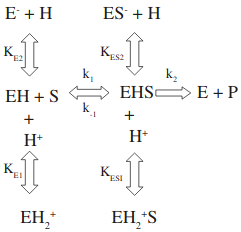  

Ферменты, по обыкновению, активны в достаточно узком диапазоне pH (5 - 9) по нескольким причинам:  
    - pH - чувствительное связывание S  
    - изменение каталитической активности E  
    - ионизация S  
    - структурные изменения E (обычно при экстремальных значениях рН)  
  
__Кинетический анализ как функция от рН дает нам информацию о природе функционально (каталитически) значимых аминокислотных остатков.__ Например, изменение активности фермента в области pH 7.0 может говорить о нейтрализации (титровании) His. Однако интерпретировать влияние pH следует с осторожностью. Внутри белка значение $ pK_a $ остатка может быть сильно изменено. Например, локализованный поблизости положительный заряд может снизить $ pK_a $ Lys, а отрицательный, наоборот, повысить.Подобные эффекты часто приводят к тому, что $ pK_a $ аминокислоты сдвигается на несколько единиц pH. Так, например, $ pK_a $ одного остатка Lys в ацетоацетатдекарбоксилазе составляет 6.6, а в свободном лизине ~ 10.5 (электростатическое влияние расположенных поблизости положительно-заряженных групп).    
  
Можно описать поведение фермента уравнением ММ при различных значениях рН.  
Зависимость v от f1, f2 (см. далее) имеет вид колокола. f1 и f2 модулируют количество EH и EHS при данном pH  

pic2.png
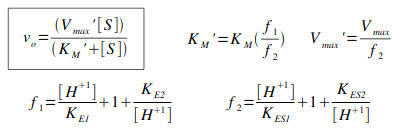

Зависимость активности некоторых ферментов от pH (см. картинку ниже).   

pic3.png
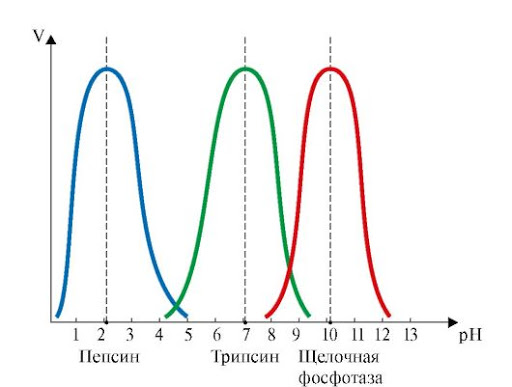

Используемые ранее зададим следующим образом: $ K_M = 19 $, $ v_{max} = 0.36 $  

In [169]:
def pH(S, h, K_E2, K_E1, K_ES2, K_ES1, K_M, v_max):
    f1 = (h/K_E1) + 1 + (K_E2/h)
    f2 = (h/K_ES1) + 1 + (K_ES2/h)
    Km = K_M * f1 /f2
    Vm = v_max / f2
    return Vm*S/(Km+S)

In [184]:
S = 0.03 # 300 mkl
PH = np.arange(0.1,14, 0.1)

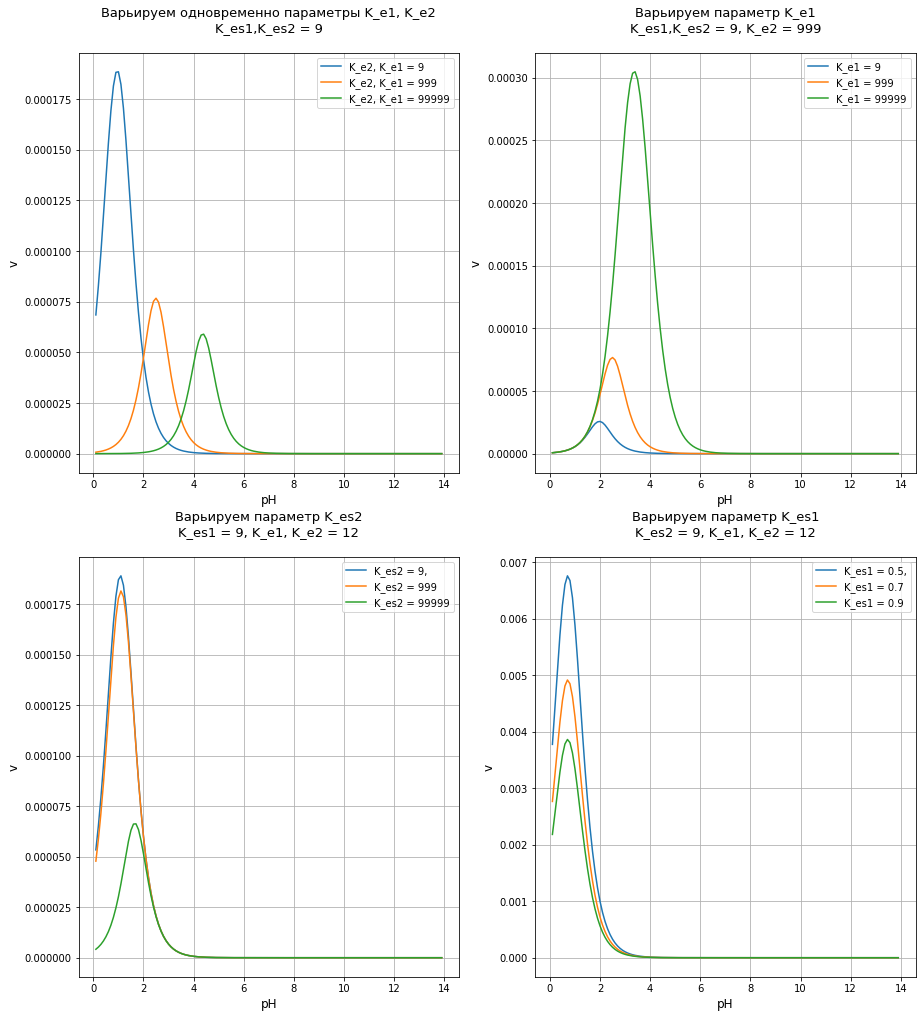

In [353]:
plt.figure(figsize=(15,17))

pylab.subplot (2, 2, 1)
plt.title('Варьируем одновременно параметры K_e1, K_e2\nK_es1,K_es2 = 9\n', fontsize = 13)
plt.plot(PH, [pH(0.03, 10**(i), 9, 9, 9, 9, 19, 0.36) for i in PH], label = 'K_e2, K_e1 = 9')
plt.plot(PH, [pH(0.03, 10**(i), 999, 99, 9, 9, 19, 0.36) for i in PH], label = 'K_e2, K_e1 = 999')
plt.plot(PH, [pH(0.03, 10**(i), 99999, 99999, 9, 9, 19, 0.36) for i in PH], label = 'K_e2, K_e1 = 99999')
plt.xlabel('pH', fontsize = 12)
plt.ylabel('v', fontsize = 12)
plt.grid()
plt.legend()

pylab.subplot (2, 2, 2)
plt.title('Варьируем параметр K_e1\nK_es1,K_es2 = 9, K_e2 = 999\n', fontsize = 13)
plt.plot(PH, [pH(0.03, 10**(i), 999, 9, 9, 9, 19, 0.36) for i in PH], label = 'K_e1 = 9')
plt.plot(PH, [pH(0.03, 10**(i), 999, 99, 9, 9, 19, 0.36) for i in PH], label = 'K_e1 = 999')
plt.plot(PH, [pH(0.03, 10**(i), 999, 99999, 9, 9, 19, 0.36) for i in PH], label = 'K_e1 = 99999')
plt.xlabel('pH', fontsize = 12)
plt.ylabel('v', fontsize = 12)
plt.grid()
plt.legend()

pylab.subplot (2, 2, 3)
plt.title('\nВарьируем параметр K_es2\nK_es1 = 9, K_e1, K_e2 = 12\n', fontsize = 13)
plt.plot(PH, [pH(0.03, 10**(i), 12, 12, 9, 9, 19, 0.36) for i in PH], label = 'K_es2 = 9,')
plt.plot(PH, [pH(0.03, 10**(i), 12, 12, 999, 9, 19, 0.36) for i in PH], label = 'K_es2 = 999')
plt.plot(PH, [pH(0.03, 10**(i), 12, 12, 99999, 9, 19, 0.36) for i in PH], label = 'K_es2 = 99999')
plt.xlabel('pH', fontsize = 12)
plt.ylabel('v', fontsize = 12)
plt.grid()
plt.legend()

pylab.subplot (2, 2, 4)
plt.title('\nВарьируем параметр K_es1\nK_es2 = 9, K_e1, K_e2 = 12\n', fontsize = 13)
plt.plot(PH, [pH(0.03, 10**(i), 5, 5, 9, 11, 0.5, 0.36) for i in PH], label = 'K_es1 = 0.5,')
plt.plot(PH, [pH(0.03, 10**(i), 5, 5, 9, 12, 0.7, 0.36) for i in PH], label = 'K_es1 = 0.7')
plt.plot(PH, [pH(0.03, 10**(i), 5, 5, 9, 13, 0.9, 0.36) for i in PH], label = 'K_es1 = 0.9')
plt.xlabel('pH', fontsize = 12)
plt.ylabel('v', fontsize = 12)
plt.grid()
plt.legend()

__Список литературы:__  
[1] http://people.uleth.ca/~steven.mosimann/bchm3100/Bchm3100_L8.pdf

# [6] Субстратное ингибирование

Рассмотрим схему гомотропного аллостеризма, где множество молекул одного химического вида могут связывать фермент (причем порядок связывания строго не определен)  

pic4.png
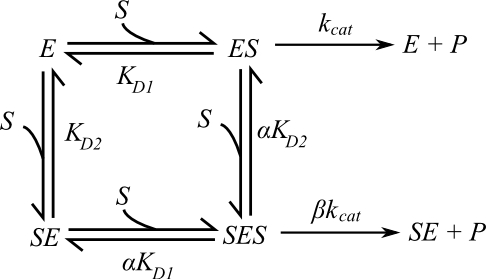

Приведенная выше схема, показывающая двухсайтовую модель "случайного порядка связывания" (random-ordered), описывается следующим уравнением скорости:  

pic5.png
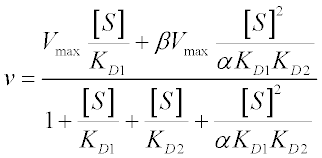

__Субстратное ингибирование происходит, когда ES менее активен, чем SES, то-есть, когда на схеме $ \beta < 0 $ __  

In [354]:
x = np.arange(0, 50, 0.5)

In [355]:
y = np.array(list(map(lambda i: ((0.36 * i / 5) + 0.1 * 0.36 * i**2 /(1*5*5)) / (1 + i/5 + i / 5 + i**2 / 25), x)))

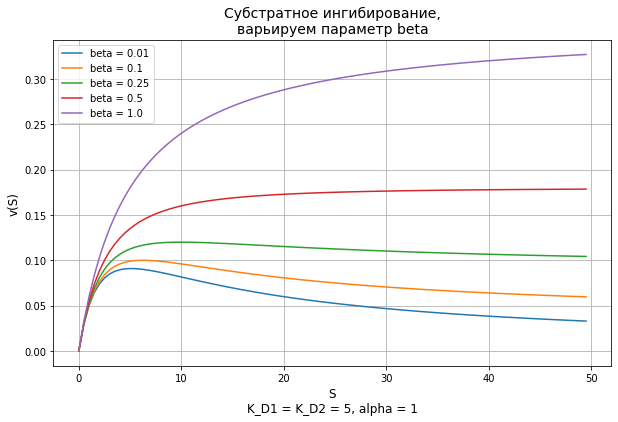

In [373]:
plt.figure(figsize=(10,6))

plt.title('Субстратное ингибирование,\nварьируем параметр beta', fontsize = 14)

beta = 0.01 # alpha = 1
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + beta * 0.36 * i**2 /(1*5*5)) / (1 + i/5 + i / 5 + i**2 / 25), x)))
plt.plot(x,y1, label = 'beta = 0.01')

beta = 0.1 # alpha = 1
y2 = np.array(list(map(lambda i: ((0.36 * i / 5) + beta * 0.36 * i**2 /(1*5*5)) / (1 + i/5 + i / 5 + i**2 / 25), x)))
plt.plot(x,y2, label = 'beta = 0.1')

beta = 0.25 # alpha = 1
y3 = np.array(list(map(lambda i: ((0.36 * i / 5) + beta * 0.36 * i**2 /(1*5*5)) / (1 + i/5 + i / 5 + i**2 / 25), x)))
plt.plot(x,y3, label = 'beta = 0.25')

beta = 0.5 # alpha = 1
y4 = np.array(list(map(lambda i: ((0.36 * i / 5) + beta * 0.36 * i**2 /(1*5*5)) / (1 + i/5 + i / 5 + i**2 / 25), x)))
plt.plot(x,y4, label = 'beta = 0.5')

beta = 1 # alpha = 1
y5 = np.array(list(map(lambda i: ((0.36 * i / 5) + beta * 0.36 * i**2 /(1*5*5)) / (1 + i/5 + i / 5 + i**2 / 25), x)))
plt.plot(x,y5, label = 'beta = 1.0')

plt.xlabel('S\nK_D1 = K_D2 = 5, alpha = 1', fontsize = 12)
plt.ylabel('v(S)', fontsize = 12)
plt.legend()
plt.grid()

__Список литературы:__  
https://depts.washington.edu/wmatkins/kinetics/allosterism.html

# [5] Кооперативное связывание

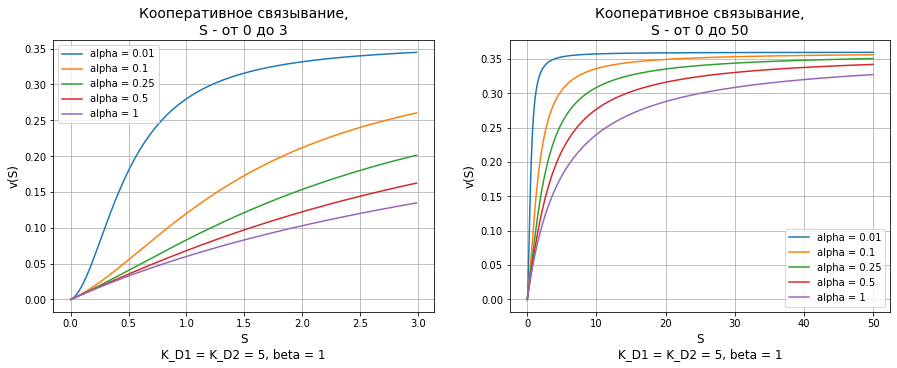

In [407]:
plt.figure(figsize=(15, 5))

pylab.subplot (1, 2, 1)
x = np.arange(0, 3, 0.01)

plt.title('Кооперативное связывание,\nS - от 0 до 3', fontsize = 14)

alpha = 0.01
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 0.01')

alpha = 0.1
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 0.1')

alpha = 0.25
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 0.25')

alpha = 0.5
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 0.5')

alpha = 1
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 1')

plt.xlabel('S\nK_D1 = K_D2 = 5, beta = 1', fontsize = 12)
plt.ylabel('v(S)', fontsize = 12)
plt.legend()
plt.grid()

pylab.subplot (1, 2, 2)
x = np.arange(0, 50, 0.01)

plt.title('Кооперативное связывание,\nS - от 0 до 50', fontsize = 14)

alpha = 0.01
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 0.01')

alpha = 0.1
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 0.1')

alpha = 0.25
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 0.25')

alpha = 0.5
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 0.5')

alpha = 1
y1 = np.array(list(map(lambda i: ((0.36 * i / 5) + 1 * 0.36 * i**2 /(alpha*25)) / (1 + i/5 + i / 5 + i**2 / (alpha*25)), x)))
plt.plot(x,y1, label = 'alpha = 1')

plt.xlabel('S\nK_D1 = K_D2 = 5, beta = 1', fontsize = 12)
plt.ylabel('v(S)', fontsize = 12)
plt.legend()
plt.grid()

На начальных участках кинетической кривой мы можем наблюдать __сигмовидную зависимость__ скорости реакции от концентрации субстрата  